In [22]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
from landlab import RasterModelGrid, HexModelGrid
from landlab.components import NormalFault, FastscapeEroder, FlowAccumulator, StreamPowerEroder
from landlab.plot import imshow_grid        

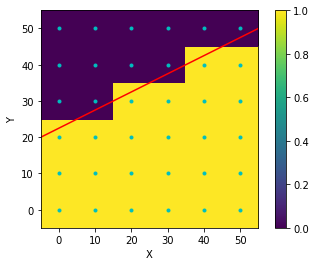

In [2]:
grid = RasterModelGrid((6, 6), spacing=10)
    
_ = grid.add_zeros('node', 'topographic__elevation')

param_dict = {'faulted_surface': 'topographic__elevation',
              'fault_dip_angle': 90.0,
              'fault_throw_rate_through_time': {'time': [0, 9, 10], 
                                                'rate': [0, 0, 0.05]},
              'fault_trace': {'y1': 50.0,
                              'x1': 55.0, 
                              'y2': 20.0, 
                              'x2': -5.0},
              'include_boundaries': True}

nf = NormalFault(grid, params=param_dict) 

plt.figure()       
imshow_grid(grid, nf.faulted_nodes, cmap='viridis')
plt.plot(grid.x_of_node, grid.y_of_node, 'c.')
plt.plot([param_dict['fault_trace']['x1'], param_dict['fault_trace']['x2']],
         [param_dict['fault_trace']['y1'], param_dict['fault_trace']['y2']], 'r')
plt.show()

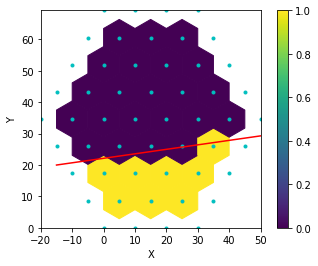

In [3]:
grid = HexModelGrid(9, 4, dx=10)
    
_ = grid.add_zeros('node', 'topographic__elevation')

param_dict = {'faulted_surface': 'topographic__elevation',
              'fault_dip_angle': 90.0,
              'fault_throw_rate_through_time': {'time': [0, 9, 10], 
                                                'rate': [0, 0, 0.05]},
              'fault_trace': {'y1': 30.0,
                              'x1': 55.0, 
                              'y2': 20.0, 
                              'x2': -15.0},
              'include_boundaries': False}

nf = NormalFault(grid, params=param_dict) 

plt.figure()       
imshow_grid(grid, nf.faulted_nodes, cmap='viridis')
plt.plot(grid.x_of_node, grid.y_of_node, 'c.')
plt.plot([param_dict['fault_trace']['x1'], param_dict['fault_trace']['x2']],
         [param_dict['fault_trace']['y1'], param_dict['fault_trace']['y2']], 'r')
ax= plt.gca()
plt.show()

# TODO. hex grid boundaries. 

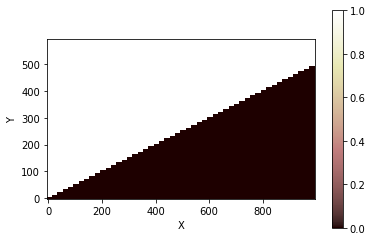

In [8]:
grid = RasterModelGrid((60, 100), spacing=10)
z = grid.add_zeros('node', 'topographic__elevation')
z += np.random.randn(z.size)

param_dict = {'faulted_surface': 'topographic__elevation',
              'fault_dip_angle': 90.0,
              'fault_throw_rate_through_time': {'time': [0, 900, 1000],
                                                'rate': [0, 0, 0.05]},
              'fault_trace': {'y1': 0,
                              'x1': 0, 
                              'y2': 30, 
                              'x2': 60},
              'include_boundaries': True}

nf = NormalFault(grid, params=param_dict)
imshow_grid(grid, nf.faulted_nodes)       

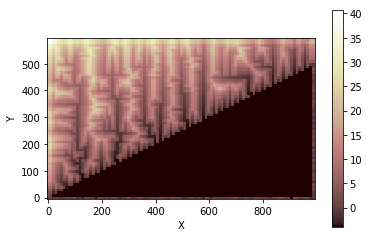

In [10]:
fr = FlowAccumulator(grid)

fs = FastscapeEroder(grid, K_sp=0.01)
         
#Run this model for 300 100-year timesteps. 
         
dt = 100.0
for i in range(300):

    nf.run_one_step(dt)
    fr.run_one_step()
    fs.run_one_step(dt)
    
imshow_grid(grid, z)       

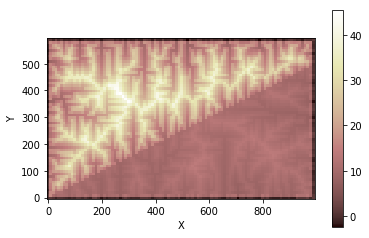

In [17]:
grid = RasterModelGrid((60, 100), spacing=10)
z = grid.add_zeros('node', 'topographic__elevation')
z += np.random.randn(z.size)

param_dict = {'faulted_surface': 'topographic__elevation',
              'fault_dip_angle': 90.0,
              'fault_throw_rate_through_time': {'time': [0, 99000, 100000],
                                                'rate': [0, 0, 0.05]},
              'fault_trace': {'y1': 0,
                              'x1': 0, 
                              'y2': 30, 
                              'x2': 60},
              'include_boundaries': False}

nf = NormalFault(grid, params=param_dict)

fr = FlowAccumulator(grid)

fs = FastscapeEroder(grid, K_sp=0.01)
         
#Run this model for 300 100-year timesteps. 
         
dt = 1000.0
uplift_rate = 0.01
for i in range(1000):

    nf.run_one_step(dt)
    fr.run_one_step()
    fs.run_one_step(dt)
    z[grid.core_nodes] += uplift_rate * dt
    
imshow_grid(grid, z) 

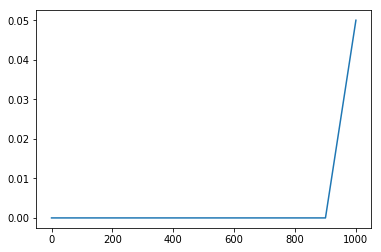

In [18]:
time = [0, 900, 1000]
rate = [0, 0, 0.05]

plt.plot(time, rate)


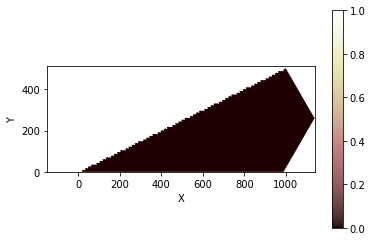

In [19]:
grid = HexModelGrid(60, 100, dx=10)
z = grid.add_zeros('node', 'topographic__elevation')
z += np.random.randn(z.size)

param_dict = {'faulted_surface': 'topographic__elevation',
              'fault_dip_angle': 90.0,
              'fault_throw_rate_through_time': {'time': time,
                                                'rate': rate},
              'fault_trace': {'y1': 0,
                              'x1': 0, 
                              'y2': 30, 
                              'x2': 60},
              'include_boundaries': False}

nf = NormalFault(grid, params=param_dict)
imshow_grid(grid, nf.faulted_nodes)  


We have to use the stream power eroder for Hex

In [ ]:
fr = FlowAccumulator(grid)

fs = StreamPowerEroder(grid, K_sp=0.01)
         
#Run this model for 300 100-year timesteps. 
         
dt = 100.0
for i in range(300):

    nf.run_one_step(dt)
    fr.run_one_step()
    fs.run_one_step(dt)
    
imshow_grid(grid, z) 